In [0]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

/content/drive/My Drive/Colab Notebooks/matrix/matrix_2/matryca_transformacja_1/data


##Wczytywanie danych

In [20]:
df = pd.read_hdf('car.h5')
df.shape

(106494, 155)

In [21]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

##Naive Model

In [22]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [30]:
feats = ['car_id']
x = df[feats].values
y = df['car_id'].values

model = DummyRegressor()
model.fit(x, y)
y_pred = model.predict(x)

mae(y, y_pred)

40104.125306754606

In [32]:
df['price_currency'].value_counts(normalize=True) * 100

PLN    99.80844
EUR     0.19156
Name: price_currency, dtype: float64

In [0]:
df = df[ df['price_currency'] != 'EUR']

In [34]:
df.shape

(106290, 155)

##Feature

In [40]:
df['param_color'].factorize()[0]   # PRZypisuje ID do wszystkich unikatowych wartości

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT = '__cat'


for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values = df[feat].factorize()[0]
  
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = df[feat].factorize()[0]

In [47]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [49]:
x = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, x, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368328

In [0]:
def group_and_plot(feat_groupby='param_marka-pojazdu', feat_agg='price_value', 
                  agg_funcs=[np.median, np.mean, np.size], feat_sort='mean',
                  top=50):
  return (
  info_data
 .groupby(feat_groupby)[feat_agg]
 .agg(agg_funcs)
 .sort_values(by=feat_sort, ascending=False)
 .head(top)
).plot(kind='bar', figsize=(15,5), subplots=True)

In [51]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(x, y)
# Pozwala wyświetlić jak duży wpływ dana cecha ma na y danego modelu
imp = PermutationImportance(m, random_state=42).fit(x,y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2546 ± 0.0048,param_napęd__cat
0.2020 ± 0.0091,param_faktura-vat__cat
0.1937 ± 0.0063,param_stan__cat
0.1429 ± 0.0083,param_rok-produkcji__cat
0.0638 ± 0.0028,param_moc__cat
0.0421 ± 0.0025,param_skrzynia-biegów__cat
0.0421 ± 0.0018,feature_kamera-cofania__cat
0.0288 ± 0.0053,param_marka-pojazdu__cat
0.0201 ± 0.0032,param_pojemność-skokowa__cat
0.0162 ± 0.0002,feature_bluetooth__cat


In [0]:
 info_data = pd.read_hdf('car.h5')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f278b068048>,
      dtype=object)

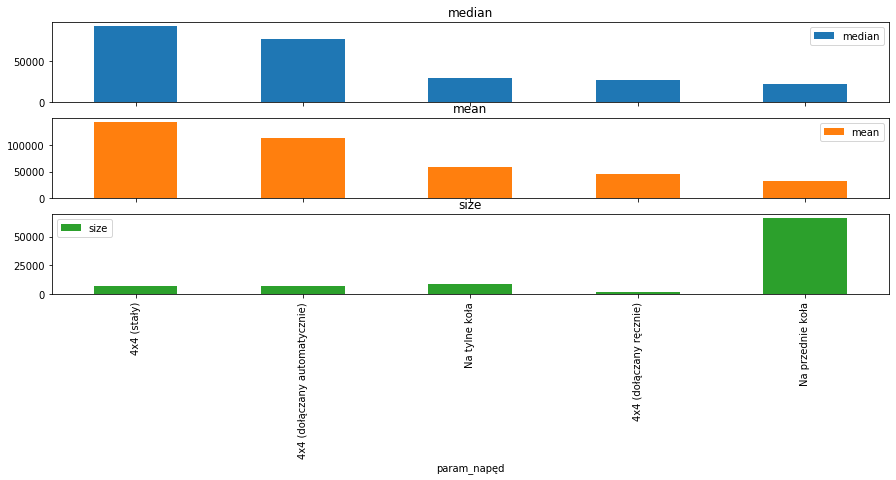

In [58]:
 group_and_plot('param_napęd', feat_sort='mean')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27895e71d0>,
      dtype=object)

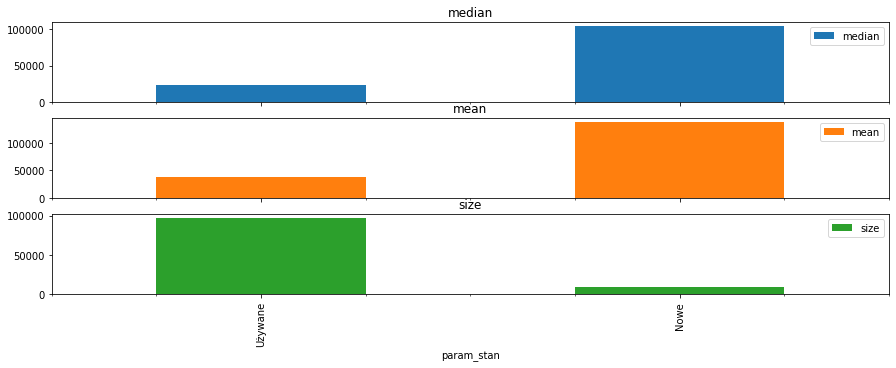

In [59]:
 group_and_plot('param_stan', feat_sort='size')